<a href="https://colab.research.google.com/github/aswinsilicon/Digital_Signal_Processing/blob/main/aswinsilicon/Digital_Signal_Processing/Experiment%201/E1_ResponseToDTSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Unit impulse')

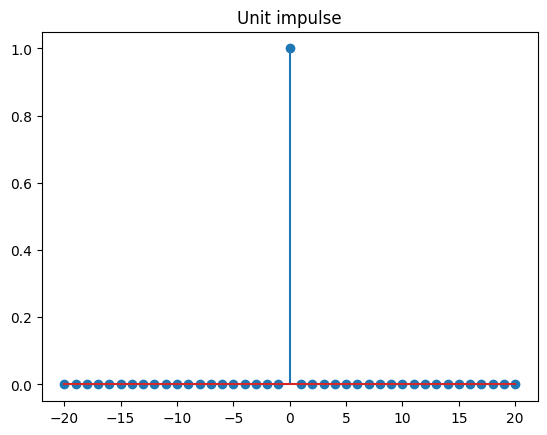

In [ ]:

n = np.arange(-20,21)
x1 = np.where(n==0,1,0)
plt.stem(n,x1)
plt.title("Unit impulse")

Text(0.5, 1.0, 'Unit Step ')

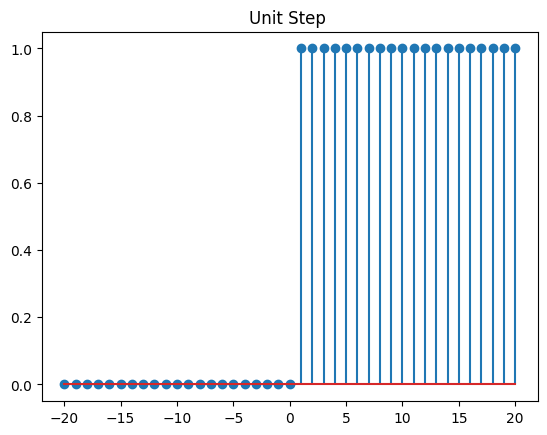

In [ ]:
x2 = np.where(n>0,1,0)
plt.stem(n,x2)
plt.title("Unit Step ")

Text(0.5, 1.0, 'Sine function')

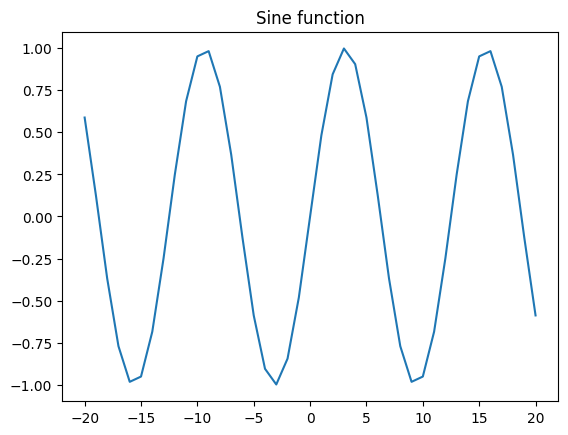

In [ ]:
fs =5
f = 4
x = np.sin(0.2*np.pi*n*f/fs)
plt.plot(n,x)
plt.title("Sine function")

In [ ]:
n=np.arange(0,20)
x=np.zeros_like(n, dtype=float)
y=np.zeros_like(n, dtype=float)
x[0]=1
for i in range(0, len(n)):
    y[i] = 0.5*y[i-1]+x[i]

Text(0.5, 1.0, 'Impulse response ')

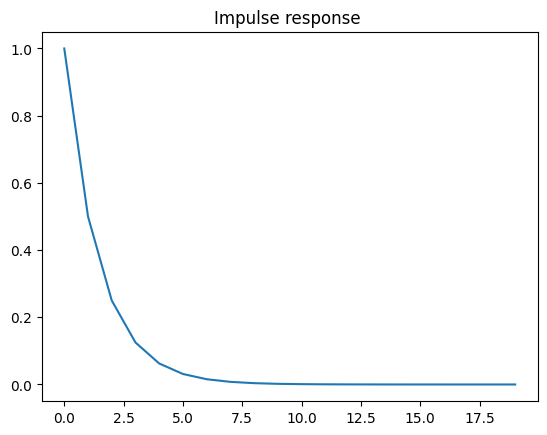

In [ ]:
plt.plot(n,y)
plt.title("Impulse response ")

In [ ]:
print(y)

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06]


Text(0.02, 0.5, 'convolved signal')

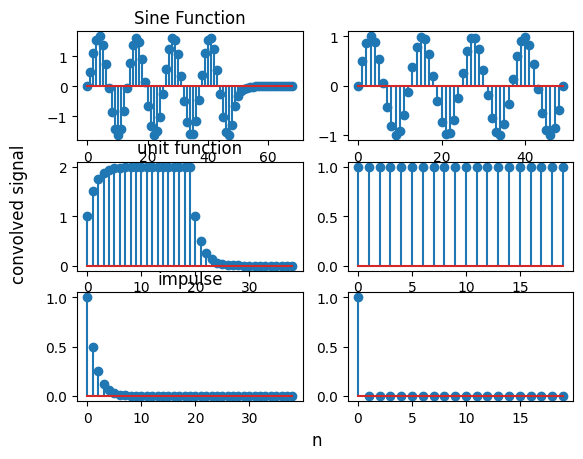

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f=2
fs=10
n1=np.linspace(-10,10,50)
n2=np.arange(0,20)
x1=np.sin(2*n1*np.pi*(f/fs))
x2=np.where(n2>=0 ,1 ,0)
x3 = np.zeros_like(n2, dtype=float)
x3[0] = 1 # impulse at n=0


# Initialize output
h = np.zeros_like(n2, dtype=float)
# Difference equation: y[n] = 0.5*y[n-1] + x[n]
for i in range(0, len(n2)):
  h[i] = 0.5 * h[i-1] + x3[i] #impulse response


#Sine response
L1 = len(x1)
M = len(h)
N1 = L1 + M - 1
y1 = np.zeros(N1)
for j in  range(N1):
  for k in range(L1):
    if (0<=(j-k) & (j-k)<M):
      y1[j] = y1[j] + x1[k] * h[j-k]

#Unit response
L2 = len(x2)
M = len(h)
N2 = L2 + M - 1
y2 = np.zeros(N2)
for j in  range(N2):
  for k in range(L2):
    if (0<=(j-k) & (j-k)<M):
      y2[j] = y2[j] + x2[k] * h[j-k]

#Step response
L3 = len(x3)
M = len(h)
N3 = L3 + M - 1
y3 = np.zeros(N3)
for j in  range(N3):
  for k in range(L3):
    if (0<=(j-k) & (j-k)<M):
      y3[j] = y3[j] + x3[k] * h[j-k]

figure, axis = plt.subplots(3, 2)

axis[0,0].stem(y1)
axis[0,1].stem(x1)
axis[0,0].set_title("Sine Function")

axis[1,0].stem(y2)
axis[1,1].stem(x2)
axis[1,0].set_title("unit function")

axis[2,0].stem(y3)
axis[2,1].stem(x3)
axis[2,0].set_title("impulse")

figure.supxlabel("n")
figure.supylabel("convolved signal")


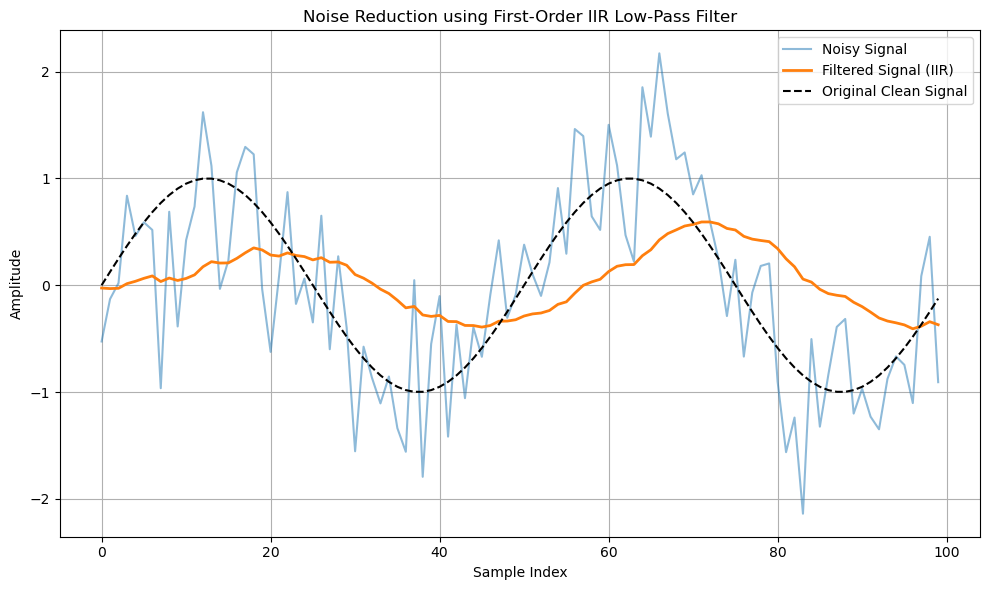

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal (e.g., sinusoid + noise)
n = np.arange(0, 100)
fs = 100
f = 2
x = np.sin(2 * np.pi * f * n / fs)
noise = np.random.normal(0, 0.5, size=n.shape)
noisy_signal = x + noise

# Initialize filter output
filtered_signal = np.zeros_like(noisy_signal)

# Choose smoothing factor alpha (0 < alpha < 1)
alpha = 0.05 # Try 0.05 or 0.2 for more/less smoothing

# Apply the IIR filter
for i in range(len(noisy_signal)):
    if i == 0:
        filtered_signal[i] = alpha * noisy_signal[i]  # or filtered_signal[i] = noisy_signal[i]
    else:
        filtered_signal[i] = (1 - alpha) * filtered_signal[i - 1] + alpha * noisy_signal[i]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(n, filtered_signal, label='Filtered Signal (IIR)', linewidth=2)
plt.plot(n, x, label='Original Clean Signal', linestyle='--', color='black')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Noise Reduction using First-Order IIR Low-Pass Filter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


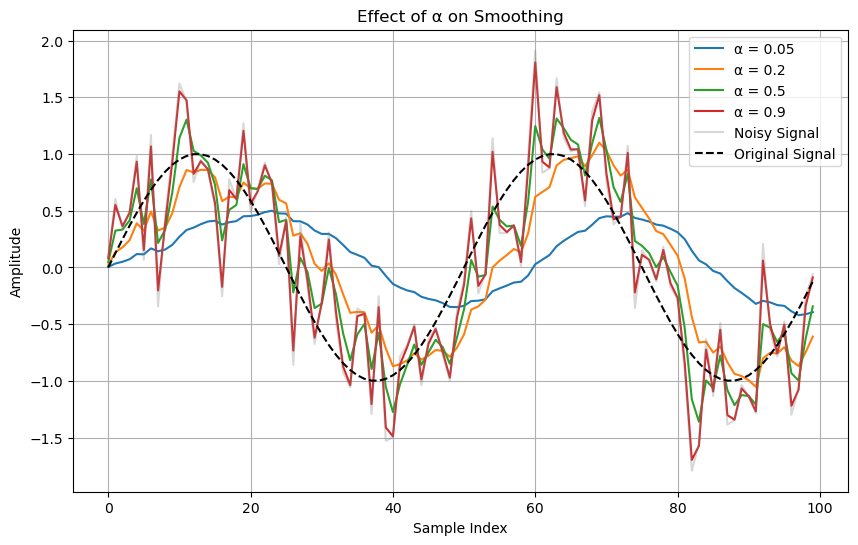

In [ ]:
#Plot with different values of \alpha
alphas = [0.05, 0.2, 0.5, 0.9]
plt.figure(figsize=(10, 6))
for alpha in alphas:
    y = np.zeros_like(noisy_signal)
    for i in range(len(noisy_signal)):
        if i == 0:
            y[i] = alpha * noisy_signal[i]
        else:
            y[i] = (1 - alpha) * y[i - 1] + alpha * noisy_signal[i]
    plt.plot(n, y, label=f'α = {alpha}')

plt.plot(n, noisy_signal, label='Noisy Signal', alpha=0.3, color='gray')
plt.plot(n, x, label='Original Signal', linestyle='--', color='black')
plt.title('Effect of α on Smoothing')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
